# Iteration 15: Organise parameters

## Plain English Summary

In iteration 14 a number of the parameters of the rehabilitation unit are hard coded within the class. We now move the mean and standard deviation and routing probability distributions to the experiment class.  The rehab class is modified to reflect the changes.

> We again split the output from the LLM into two parts using two separate prompts. We first limit the output to only display the Experiment class. We follows this up by only displaying the rehab unit code.

> This iteration allows us to add more tests of the Rehab unit model component. We add extreme value tests to prevent any patients leaving the Rehab unit.

## Notebook imports

In [1]:
from IPython.display import Markdown, display, HTML
import math
import statistics
from sim_tools.distributions import Lognormal

## LLM Prompt 1 <a class="anchor" id="llm_prompt"></a>

In [2]:
display(Markdown("inputs/15_iteration.md"))

## Main command

Modify the `Experiment` class.  Add new parameters that represent

1. the means and standard deviations of the lognormal distributions used in `RehabilitationUnit` class.
2. the probabilities of the Empirical distributions (represented as python lists)

pre fix all parameters with "rehab_"

Do not remove or overwrite any existing parameters in `Experiment`

Modify `RehabilitationUnit` to use the new parameters.

Display only the modified `Experiment` class

## LLM Prompt 2

In [3]:
display(Markdown("inputs/15a_iteration.md"))

Display only the `RehabilitationUnit` class code

## Diff of notebooks. <a class="anchor" id="diff"></a>

In [4]:
#display(HTML("diffs/15_iteration.html"))

## Date and time of input to LLM

> 1630 17th March 2024

## Observations on the LLM Output

* The diff shows that the `RehabilitationUnit` treatment functions have been modified in the expected places. The LLM has coped with the conditional logic in the stroke treatment function.  I.e. the code has changed from the following in  iteration 14 

```python
def stroke_rehab_treatment(self):
    post_rehab_destination = np.random.choice(["ESD", "Other"], p=[0.4, 0.6])
    if post_rehab_destination == "ESD":
        mu, sigma = normal_moments_from_lognormal(30.3, 23.1)
    else:
        mu, sigma = normal_moments_from_lognormal(28.4, 27.2)
    
    length_of_stay = np.random.lognormal(mean=mu, sigma=sigma)
    
    yield self.env.timeout(length_of_stay)
    print(f"Stroke patient {self.patient_count} finished treatment at Rehabilitation Unit at {self.env.now} days")
```

to the following in iteration 15:

```python
def stroke_rehab_treatment(self):
    post_rehab_destination = np.random.choice(["ESD", "Other"], p=self.experiment.rehab_stroke_post_destination_prob)
    if post_rehab_destination == "ESD":
        mu, sigma = normal_moments_from_lognormal(self.experiment.rehab_stroke_esd_mean, self.experiment.rehab_stroke_esd_std_dev)
    else:
        mu, sigma = normal_moments_from_lognormal(self.experiment.rehab_stroke_other_mean, self.experiment.rehab_stroke_other_std_dev)
    
    length_of_stay = np.random.lognormal(mean=mu, sigma=sigma)
    
    yield self.env.timeout(length_of_stay)
    print(f"Stroke patient {self.patient_count} finished treatment at Rehabilitation Unit at {self.env.now} days")
```

## Sources reported by the LLM

* None reported at time of generation.

## Code carried over from iteration 13

We carry over:

* `normal_moments_from_lognormal` - a function for converting moments of a lognormal to underlying normal
*  `audit_acute_occupancy` - code to observe the ASU occupancy at specified time intervals.
*  `calculate_occupancy_frequencies` - calculate relative frequencies of occupancy observations
*  `occupancy_plot` - show occupancy as a bar chart.
*  `calculate_prob_delay`
*  `prob_delay_plot`
*  `AcuteStrokeUnit`

## Model code <a class="anchor" id="model_code"></a>

### Imports

In [5]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

### lognormal function

In [6]:
# External function to convert Lognormal moments to Normal moments
def normal_moments_from_lognormal(mean, std_dev):
    phi = np.sqrt(std_dev ** 2 + mean ** 2)
    mu = np.log(mean ** 2 / np.sqrt(std_dev ** 2 + mean ** 2))
    sigma = np.sqrt(np.log(phi ** 2 / mean ** 2))
    return mu, sigma

### Experiment class

> This code was generated in iteration 15

In [7]:
class Experiment:
    def __init__(self, stroke_mean=1.2, tia_mean=9.3, neuro_mean=3.6, other_mean=3.2,
                 rehab_mean=7.4, rehab_std_dev=8.6, esd_mean=4.6, esd_std_dev=4.8,
                 other_dest_mean=7.0, other_dest_std_dev=8.7,
                 tia_dest_mean=1.8, tia_dest_std_dev=5.0,
                 neuro_dest_mean=4.0, neuro_dest_std_dev=5.0,
                 other_dest_mean_2=3.8, other_dest_std_dev_2=5.2,
                 run_length=1825, trace=False,
                 rehab_stroke_iat=21.8, rehab_neuro_iat=31.7, rehab_other_iat=28.6,
                 rehab_stroke_esd_mean=30.3, rehab_stroke_esd_std_dev=23.1,
                 rehab_stroke_other_mean=28.4, rehab_stroke_other_std_dev=27.2,
                 rehab_neuro_mean=27.6, rehab_neuro_std_dev=28.4,
                 rehab_other_mean=16.1, rehab_other_std_dev=14.1,
                 rehab_stroke_post_destination_prob=[0.4, 0.6],
                 rehab_neuro_post_destination_prob=[0.09, 0.91],
                 rehab_other_post_destination_prob=[0.12, 0.88]):
        self.stroke_interarrival_mean = stroke_mean
        self.tia_interarrival_mean = tia_mean
        self.neuro_interarrival_mean = neuro_mean
        self.other_interarrival_mean = other_mean
        self.rehab_mean = rehab_mean
        self.rehab_std_dev = rehab_std_dev
        self.esd_mean = esd_mean
        self.esd_std_dev = esd_std_dev
        self.other_dest_mean = other_dest_mean
        self.other_dest_std_dev = other_dest_std_dev
        self.tia_dest_mean = tia_dest_mean
        self.tia_dest_std_dev = tia_dest_std_dev
        self.neuro_dest_mean = neuro_dest_mean
        self.neuro_dest_std_dev = neuro_dest_std_dev
        self.other_dest_mean_2 = other_dest_mean_2
        self.other_dest_std_dev_2 = other_dest_std_dev_2
        self.run_length = run_length
        self.trace = trace
        self.asu_occupancy = []  # List to store ASU occupancy data
        
        # New parameters for RehabilitationUnit treatment distributions and probabilities
        self.rehab_stroke_iat = rehab_stroke_iat
        self.rehab_neuro_iat = rehab_neuro_iat
        self.rehab_other_iat = rehab_other_iat
        
        self.rehab_stroke_esd_mean = rehab_stroke_esd_mean
        self.rehab_stroke_esd_std_dev = rehab_stroke_esd_std_dev
        
        self.rehab_stroke_other_mean = rehab_stroke_other_mean
        self.rehab_stroke_other_std_dev = rehab_stroke_other_std_dev
        
        self.rehab_neuro_mean = rehab_neuro_mean
        self.rehab_neuro_std_dev = rehab_neuro_std_dev
        
        self.rehab_other_mean = rehab_other_mean
        self.rehab_other_std_dev = rehab_other_std_dev
        
        # Probabilities for post-rehab destination sampling for each patient type in RehabilitationUnit
        self.rehab_stroke_post_destination_prob = rehab_stroke_post_destination_prob
        self.rehab_neuro_post_destination_prob = rehab_neuro_post_destination_prob
        self.rehab_other_post_destination_prob = rehab_other_post_destination_prob

### Acute stroke unit class

In [8]:
# Define the AcuteStrokeUnit class with updated patient generators for destination sampling
class AcuteStrokeUnit:
    def __init__(self, env, experiment):
        self.env = env
        self.experiment = experiment
        self.patient_count = 0
        self.occupancy = 0

    def stroke_acute_treatment(self, patient_type):
        if patient_type == "Rehab":
            mu, sigma = normal_moments_from_lognormal(self.experiment.rehab_mean, self.experiment.rehab_std_dev)
            length_of_stay = np.random.lognormal(mean=mu, sigma=sigma)
        elif patient_type == "ESD":
            mu, sigma = normal_moments_from_lognormal(self.experiment.esd_mean, self.experiment.esd_std_dev)
            length_of_stay = np.random.lognormal(mean=mu, sigma=sigma)
        else:
            mu, sigma = normal_moments_from_lognormal(self.experiment.other_dest_mean, self.experiment.other_dest_std_dev)
            length_of_stay = np.random.lognormal(mean=mu, sigma=sigma)
        
        self.occupancy += 1  # Increment occupancy when a patient arrives
        yield self.env.timeout(length_of_stay)
        if self.experiment.trace:
            print(f"Stroke patient {self.patient_count} finished treatment at {self.env.now} days")
        self.occupancy -= 1  # Decrement occupancy at the end of treatment

    def tia_acute_treatment(self):
        mu, sigma = normal_moments_from_lognormal(self.experiment.tia_dest_mean, self.experiment.tia_dest_std_dev)
        length_of_stay = np.random.lognormal(mean=mu, sigma=sigma)
        
        self.occupancy += 1  # Increment occupancy when a patient arrives
        yield self.env.timeout(length_of_stay)
        if self.experiment.trace:
            print(f"TIA patient {self.patient_count} finished treatment at {self.env.now} days")
        self.occupancy -= 1  # Decrement occupancy at the end of treatment

    def neuro_acute_treatment(self):
        mu, sigma = normal_moments_from_lognormal(self.experiment.neuro_dest_mean, self.experiment.neuro_dest_std_dev)
        length_of_stay = np.random.lognormal(mean=mu, sigma=sigma)
        
        self.occupancy += 1  # Increment occupancy when a patient arrives
        yield self.env.timeout(length_of_stay)
        if self.experiment.trace:
            print(f"Complex Neuro patient {self.patient_count} finished treatment at {self.env.now} days")
        self.occupancy -= 1  # Decrement occupancy at the end of treatment

    def other_acute_treatment(self):
        mu, sigma = normal_moments_from_lognormal(self.experiment.other_dest_mean_2, self.experiment.other_dest_std_dev_2)
        length_of_stay = np.random.lognormal(mean=mu, sigma=sigma)
        
        self.occupancy += 1  # Increment occupancy when a patient arrives
        yield self.env.timeout(length_of_stay)
        if self.experiment.trace:
            print(f"Other patient {self.patient_count} finished treatment at {self.env.now} days")
        self.occupancy -= 1  # Decrement occupancy at the end of treatment

    def stroke_patient_generator(self):
        while True:
            interarrival_time = np.random.exponential(self.experiment.stroke_interarrival_mean)
            yield self.env.timeout(interarrival_time)
            self.patient_count += 1
            post_asu_destination = np.random.choice(["Rehab", "ESD", "Other"], p=[0.24, 0.13, 0.63])
            if self.experiment.trace:
                print(f"Stroke patient {self.patient_count} arrived at {self.env.now} days and will go to {post_asu_destination}")
            self.env.process(self.stroke_acute_treatment(post_asu_destination))

    def tia_patient_generator(self):
        while True:
            interarrival_time = np.random.exponential(self.experiment.tia_interarrival_mean)
            yield self.env.timeout(interarrival_time)
            self.patient_count += 1
            post_asu_destination = np.random.choice(["Rehab", "ESD", "Other"], p=[0.01, 0.01, 0.98])
            if self.experiment.trace:
                print(f"TIA patient {self.patient_count} arrived at {self.env.now} days and will go to {post_asu_destination}")
            self.env.process(self.tia_acute_treatment())

    def neuro_patient_generator(self):
        while True:
            interarrival_time = np.random.exponential(self.experiment.neuro_interarrival_mean)
            yield self.env.timeout(interarrival_time)
            self.patient_count += 1
            post_asu_destination = np.random.choice(["Rehab", "ESD", "Other"], p=[0.11, 0.05, 0.84])
            if self.experiment.trace:
                print(f"Complex Neuro patient {self.patient_count} arrived at {self.env.now} days and will go to {post_asu_destination}")
            self.env.process(self.neuro_acute_treatment())

    def other_patient_generator(self):
        while True:
            interarrival_time = np.random.exponential(self.experiment.other_interarrival_mean)
            yield self.env.timeout(interarrival_time)
            self.patient_count += 1
            post_asu_destination = np.random.choice(["Rehab", "ESD", "Other"], p=[0.05, 0.10, 0.85])
            if self.experiment.trace:
                print(f"Other patient {self.patient_count} arrived at {self.env.now} days and will go to {post_asu_destination}")
            self.env.process(self.other_acute_treatment())


### Rehabilitation Unit class <a class="anchor" id="iteration_code_a"></a>

> This is the code generated in iteration 15

In [9]:
class RehabilitationUnit:
    def __init__(self, env, experiment):
        self.env = env
        self.experiment = experiment
        self.patient_count = 0
        self.stroke_count = 0
        self.neuro_count = 0
        self.other_count = 0

    def stroke_patient_generator(self):
        while True:
            interarrival_time = np.random.exponential(self.experiment.rehab_stroke_iat)
            yield self.env.timeout(interarrival_time)
            self.patient_count += 1
            self.stroke_count += 1
            print(f"Stroke patient {self.patient_count} arrived at Rehabilitation Unit at {self.env.now} days")
            self.env.process(self.stroke_rehab_treatment())

    def neuro_patient_generator(self):
        while True:
            interarrival_time = np.random.exponential(self.experiment.rehab_neuro_iat)
            yield self.env.timeout(interarrival_time)
            self.patient_count += 1
            self.neuro_count += 1
            print(f"Complex Neurological patient {self.patient_count} arrived at Rehabilitation Unit at {self.env.now} days")
            self.env.process(self.neuro_rehab_treatment())

    def other_patient_generator(self):
        while True:
            interarrival_time = np.random.exponential(self.experiment.rehab_other_iat)
            yield self.env.timeout(interarrival_time)
            self.patient_count += 1
            self.other_count += 1
            print(f"Other patient {self.patient_count} arrived at Rehabilitation Unit at {self.env.now} days")
            self.env.process(self.other_rehab_treatment())

    def stroke_rehab_treatment(self):
        post_rehab_destination = np.random.choice(["ESD", "Other"], p=self.experiment.rehab_stroke_post_destination_prob)
        if post_rehab_destination == "ESD":
            mu, sigma = normal_moments_from_lognormal(self.experiment.rehab_stroke_esd_mean, self.experiment.rehab_stroke_esd_std_dev)
        else:
            mu, sigma = normal_moments_from_lognormal(self.experiment.rehab_stroke_other_mean, self.experiment.rehab_stroke_other_std_dev)
        
        length_of_stay = np.random.lognormal(mean=mu, sigma=sigma)
        
        yield self.env.timeout(length_of_stay)
        print(f"Stroke patient {self.patient_count} finished treatment at Rehabilitation Unit at {self.env.now} days")

    def neuro_rehab_treatment(self):
        post_rehab_destination = np.random.choice(["ESD", "Other"], p=self.experiment.rehab_neuro_post_destination_prob)
        mu, sigma = normal_moments_from_lognormal(self.experiment.rehab_neuro_mean, self.experiment.rehab_neuro_std_dev)
        
        length_of_stay = np.random.lognormal(mean=mu, sigma=sigma)
        
        yield self.env.timeout(length_of_stay)
        print(f"Complex Neurological patient {self.patient_count} finished treatment at Rehabilitation Unit at {self.env.now} days")

    def other_rehab_treatment(self):
        post_rehab_destination = np.random.choice(["ESD", "Other"], p=self.experiment.rehab_other_post_destination_prob)
        mu, sigma = normal_moments_from_lognormal(self.experiment.rehab_other_mean, self.experiment.rehab_other_std_dev)
        
        length_of_stay = np.random.lognormal(mean=mu, sigma=sigma)
        
        yield self.env.timeout(length_of_stay)
        print(f"Other patient {self.patient_count} finished treatment at Rehabilitation Unit at {self.env.now} days")

### Occupancy auditing function

In [10]:
# Define the audit_acute_occupancy generator function to record ASU occupancy at intervals
def audit_acute_occupancy(acute_audit_interval, asu, experiment):
    while True:
        yield asu.env.timeout(acute_audit_interval)
        experiment.asu_occupancy.append(asu.occupancy)

### Occupancy post-processing code

In [11]:
def calculate_occupancy_frequencies(data):
    unique_values, counts = np.unique(data, return_counts=True)
    relative_frequency = counts / len(data)
    cumulative_frequency = np.cumsum(relative_frequency)
    return relative_frequency, cumulative_frequency, unique_values

In [12]:
def occupancy_plot(relative_frequency, unique_values, x_label="No. people in ASU", fig_size=(12, 5)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.bar(unique_values, relative_frequency, align='center', alpha=0.7)
    ax.set_xticks(np.arange(0, 31, 1))
    ax.set_xlabel(x_label)
    ax.set_ylabel('Relative Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.title('Occupancy Relative Frequency Distribution')
    plt.show()
    return fig, ax

### Probability of deplay post-processing code

In [13]:
def calculate_prob_delay(relative_frequencies, cumulative_frequencies):
    prob_delay = np.array(relative_frequencies) / np.array(cumulative_frequencies)
    return prob_delay

In [14]:
def prob_delay_plot(prob_delay, unique_values, x_label="No. acute beds available", fig_size=(12, 5)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.step(unique_values, prob_delay, where='post')
    ax.set_xticks(np.arange(0, 31, 1))
    ax.set_xlabel(x_label)
    ax.set_ylabel('Probability of Delay')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.title('Probability of Delay Distribution')
    plt.show()
    return fig, ax

### Script to run the model (ASU only)

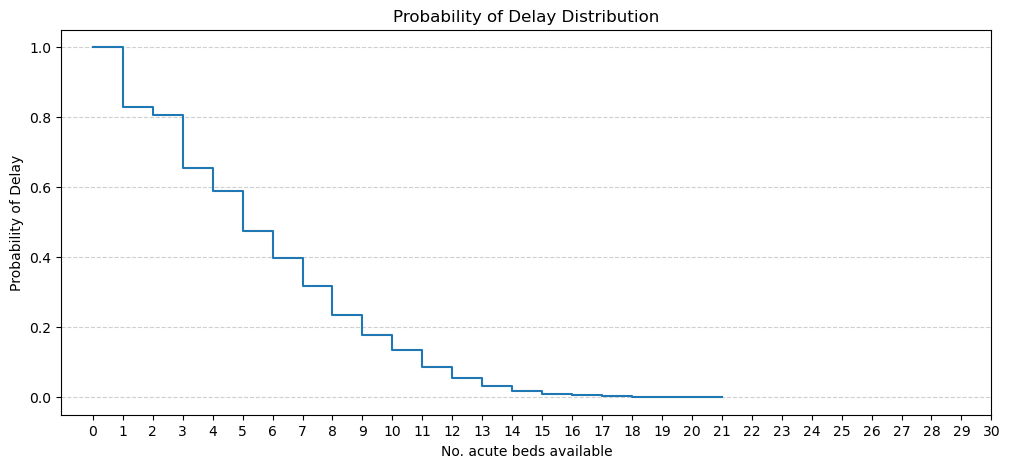

(<Figure size 1200x500 with 1 Axes>,
 <Axes: title={'center': 'Probability of Delay Distribution'}, xlabel='No. acute beds available', ylabel='Probability of Delay'>)

In [15]:
# Create an instance of the Experiment class with default parameters and trace set to False
default_experiment_params = Experiment()

# Create the simulation environment and AcuteStrokeUnit instance with the Experiment parameters
env = simpy.Environment()
acu_experiment = AcuteStrokeUnit(env, default_experiment_params)

# Start the patient generators for each type of patient in the AcuteStrokeUnit instance
env.process(acu_experiment.stroke_patient_generator())
env.process(acu_experiment.tia_patient_generator())
env.process(acu_experiment.neuro_patient_generator())
env.process(acu_experiment.other_patient_generator())

# Start the audit_acute_occupancy generator function to record ASU occupancy at intervals
env.process(audit_acute_occupancy(1, acu_experiment, default_experiment_params))

# Run the simulation until the specified run length in the Experiment parameters
# modified by tester - run length * 10
env.run(until=default_experiment_params.run_length * 10)

# Calculate occupancy frequencies and plot the relative frequency distribution
relative_freq, cumulative_freq, unique_vals = calculate_occupancy_frequencies(default_experiment_params.asu_occupancy)

# Calculate probability of delay and plot the step chart
prob_delay = calculate_prob_delay(relative_freq, cumulative_freq)
prob_delay_plot(prob_delay, unique_vals)


In [16]:
# added by tester
print(f'{len(default_experiment_params.asu_occupancy)=}')
print(f'{env.now=}')

len(default_experiment_params.asu_occupancy)=18249
env.now=18250


### Script to run the model (Rehab unit only) <a class="anchor" id="iteration_code_b"></a>

> This code was generated in iteration 13a

In [17]:
# Create an instance of the Experiment class with default parameters and new inter-arrival means for RehabilitationUnit
default_experiment_params = Experiment(rehab_stroke_iat=21.8, rehab_neuro_iat=31.7, rehab_other_iat=28.6)

# Create the simulation environment
env = simpy.Environment()

# Create an instance of the RehabilitationUnit class with the simulation environment and Experiment instance
rehab_unit = RehabilitationUnit(env, default_experiment_params)

# Start the patient generators for each type of patient in the RehabilitationUnit instance
env.process(rehab_unit.stroke_patient_generator())
env.process(rehab_unit.neuro_patient_generator())
env.process(rehab_unit.other_patient_generator())

# Run the simulation for a specified duration (e.g., 100 days)
env.run(until=100)

Complex Neurological patient 1 arrived at Rehabilitation Unit at 1.021165278298032 days
Complex Neurological patient 1 finished treatment at Rehabilitation Unit at 6.654141691261026 days
Complex Neurological patient 2 arrived at Rehabilitation Unit at 8.86402653164546 days
Complex Neurological patient 2 finished treatment at Rehabilitation Unit at 21.482447678041332 days
Stroke patient 3 arrived at Rehabilitation Unit at 22.200222858009194 days
Stroke patient 4 arrived at Rehabilitation Unit at 26.003428139302763 days
Stroke patient 5 arrived at Rehabilitation Unit at 28.015458983060014 days
Stroke patient 5 finished treatment at Rehabilitation Unit at 37.17453343380347 days
Stroke patient 6 arrived at Rehabilitation Unit at 39.185935882316585 days
Stroke patient 6 finished treatment at Rehabilitation Unit at 41.936998335035 days
Complex Neurological patient 7 arrived at Rehabilitation Unit at 44.212017975480464 days
Other patient 8 arrived at Rehabilitation Unit at 48.16659148752138 d

## Testing <a class="anchor" id="testing_code"></a>
* **Results processing 1**: code correctly calculates relative and cumulative frequencies
    * Expected result: for [1, 1, 1, 1, 2, 2, 2, 3, 3, 4] relative = [4/10, 3/10, 2/10, 1/10] and cum = [4/10, 7/10, 9/10, 1.0]
    * Actual result (PASS): for [1, 1, 1, 1, 2, 2, 2, 3, 3, 4] relative = [4/10, 3/10, 2/10, 1/10] and cum = [4/10, 7/10, 9/10, 1.0]
* **Results processing 2**: test that prob delay is calculated correctly.
    * Expected result: The probability of delay is [1.0, 0.3/0.7, 0.2/0.9, 0.1/1.0]
    * Actual result (PASS): The probability of delay is [1.0, 0.3/0.7, 0.2/0.9, 0.1/1.0]
* **Results collection test 1**: Test the result collection process for ASU collects ward occupancy every day
    * Expected result: The number of observations taken is 1 less the number of days the model is run.
    * Actual result (PASS):  The number of observations taken is 1 less the number of days the model is run.
* **Results collection test 2**: Test ASU ward occupancy data collected is in a sensible range.
    * Expected result: The type collected is int. The values are in the range in the range 0 to 50 with sensible moments.
    * Actual result (PASS):  The type collected is int. The values are in the range in the range 0 to 50 with sensible moments.
* **Suppress simulated trace**: Test that setting experiment.trace = False suppresses output by default.
    * Expected result: The model runs with no simulated log output
    * Actual result (PASS): The model runs with no simulated log output
* **Testing lognormal function**: Test that lognomal function correctly calculates the moments of the underlying normal dist.
    * Expected result: The LLM generated function and `sim-tools.distributions.Lognormal` perform the same conversion.
    * Actual results (PASS):  The functions generate the same values.
* **Extreme value test 1**: TIA, Complex Neuro, Other, have their inter-arrival time is set to $M$ a very large number
    * Expected result: The only type of patient to arrive to the model is "Stroke"
    * Actual result (PASS): The only type of patient to arrive to the model is "Stroke"
* **Extreme value test 2**: All patient types have have their inter-arrival time is set to $M$ a very large number
    * Expected result: No patients arrive to the model.
    * Actual result (PASS): No patients arrive to the model.
* **Different run length**: The run length of the model is set to 10 days.
    * Expected result: The model should runs no longer than 10 simulated time periods
    * Actual result (PASS): The model runs no longer than 10 simulated time periods
* **Extreme value test 3**: All patient types have have their mean length of stay time set to $M$ a very large number
    * Expected result: No patients depart the model (only arrivals seen in log)
    * Actual Results (PASS): No patients depart the model.
* **Extreme value test 4**: All patient types apart from stroke->rehab have have their mean length of stay time set to $M$ a very large number
    * Expected result: Only stroke patients depart the model (seen in log)
    * Actual Results (PASS): Only stroke patient depart the model.
* **Extreme value test 5**: In rehab, Complex Neuro, and Other, have their inter-arrival time is set to $M$ a very large number
    * Expected result: The only type of patient to arrive to the rehab model is "Stroke"
    * Actual result (PASS): The only type of patient to arrive to the rehab model is "Stroke"
* **Extreme value test 6**: In the rehab model, all patient types have have their inter-arrival time is set to $M$ a very large number
    * Expected result: No patients arrive to the model.
    * Actual result (PASS): No patients arrive to the model.

### Results processing 1

Test that the code correctly calculates the relative and cumulative frequencies of a python list of integer values.

(PASS)

In [18]:
def result_processing_test_1(values, rel_expected, cum_expected):
    '''
    Test the `calculate_occupancy_frequencies` function works
    as expected.

    Expected result: relative frequencies and cumulative freqs
    are the same as expected values.

    Params:
    ------
    values: list
        list of values to test

    rel_expected: list
        list of floats - expected relative freqs

    cum_expected: list
        list of floats - expected cumulative freqs

    Returns:
    -------
    bool: does the model pass the test.
    '''
    rel, cum, unique = calculate_occupancy_frequencies(values)
    # use all close to allow for minor floating point differences.
    return (set(rel) == set(rel_expected)) and  np.allclose(np.array(cum_expected), cum)

In [19]:
result_processing_test_1(values=[1, 1, 1, 1, 2, 2, 2, 3, 3, 4],
                         rel_expected=[0.4, 0.3, 0.2, 0.1],
                         cum_expected=[0.4, 0.7, 0.9, 1.0])

True

### Results Processing test 2

Test that the calculation of the probability of delay is correct.

(PASS)

In [20]:
def result_processing_test_2(relative, cum, p_delay_expected):
    '''
    Test the probability of delay is calculated correctly.
    
    Params:
    ------
    relative: list
        list of floats - relative freqs

    cum: list
        list of floats - cumulative freqs

    Returns:
    -------
    bool: does the function pass the test.
    '''
    p_delay = calculate_prob_delay(relative, cum)
    # use all close to allow for minor floating point differences.
    return np.allclose(np.array(p_delay_expected), p_delay)

In [21]:
relative = [0.4, 0.3, 0.2, 0.1],
cum = [0.4, 0.7, 0.9, 1.0]
expected = [1.0, 0.3/0.7, 0.2/0.9, 0.1/1.0]
result = result_processing_test_2(relative, cum, expected)
result

True

### Results collection test 1

Test the optional results collection process works correctly.  The process should collect acute stroke occupancy every day

(PASS)

In [22]:
def results_collection_test1(audit_interval=1):
    '''
    Test the model collects acute stroke occupancy every day

    Expected result: len(experiment.occupancy) == env.now - 1

    Params:
    ------
    audit_interval: 1
        duration of audit.

    Returns:
    -------
    bool: does the model pass the test.
    '''
    # Create the simulation environment
    env = simpy.Environment()
    
    # Initialize the Acute Stroke Unit model#
    # set ASU arr~ival rates
    default_experiment_params = Experiment()

    acu_experiment = AcuteStrokeUnit(env, default_experiment_params)
    
    # Start the patient generators for each type of patient
    env.process(acu_experiment.stroke_patient_generator())
    env.process(acu_experiment.tia_patient_generator())
    env.process(acu_experiment.neuro_patient_generator())
    env.process(acu_experiment.other_patient_generator())

    # optional results collection
    # Start the audit_acute_occupancy generator function to record ASU occupancy at intervals
    env.process(audit_acute_occupancy(audit_interval, acu_experiment, default_experiment_params))
    
    # Run the simulation until the specified run length in the Experiment parameters
    env.run(until=default_experiment_params.run_length)

    print(f'{len(default_experiment_params.asu_occupancy)=}')
    print(f'{env.now=}')
    return len(default_experiment_params.asu_occupancy) == (env.now - 1)

In [23]:
results_collection_test1()

len(default_experiment_params.asu_occupancy)=1824
env.now=1825


True

### Result collection test 2

In [24]:
def results_collection_test2(audit_interval=1):
    '''
    Test ASU ward occupancy data collected is in a sensible range.
    
    Expected result: The type collected is int. The values are in 
    the range in the range 0 to 50 with sensible moments.

    prints out:
    min
    max
    mean
    deciles

    Params:
    ------
    audit_interval: 1
        duration of audit.

    Returns:
    -------
    None
    '''
    # Create the simulation environment
    env = simpy.Environment()
    
    # Initialize the Acute Stroke Unit model#
    # set ASU arr~ival rates
    default_experiment_params = Experiment()

    acu_experiment = AcuteStrokeUnit(env, default_experiment_params)
    
    # Start the patient generators for each type of patient
    env.process(acu_experiment.stroke_patient_generator())
    env.process(acu_experiment.tia_patient_generator())
    env.process(acu_experiment.neuro_patient_generator())
    env.process(acu_experiment.other_patient_generator())

    # optional results collection
    # Start the audit_acute_occupancy generator function to record ASU occupancy at intervals
    env.process(audit_acute_occupancy(audit_interval, acu_experiment, default_experiment_params))
    
    # Run the simulation until the specified run length in the Experiment parameters
    env.run(until=default_experiment_params.run_length)

    print(f'{min(default_experiment_params.asu_occupancy)=}')
    print(f'{max(default_experiment_params.asu_occupancy)=}')
    print(f'{statistics.fmean(default_experiment_params.asu_occupancy)=}')
    print([round(q, 1) for q in statistics.quantiles(default_experiment_params.asu_occupancy, n=10)])

In [25]:
results_collection_test2()

min(default_experiment_params.asu_occupancy)=0
max(default_experiment_params.asu_occupancy)=23
statistics.fmean(default_experiment_params.asu_occupancy)=8.344298245614034
[5.0, 6.0, 7.0, 8.0, 8.0, 9.0, 10.0, 11.0, 12.0]


## Test suppress trace

(PASS)

In [26]:
def test_suppress_log(trace):
    '''
    Test that setting experiment.trace 
    False suppresses output.

    Expected result: patient_count > 0

    Params:
    ------
    trace: bool
        is trace outputted or not?

    Returns:
    -------
    int: number of patient arrivals.
    '''
    # Create the simulation environment
    env = simpy.Environment()
    
    # Initialize the Acute Stroke Unit model#
    # set ASU arr~ival rates
    default_experiment_params = Experiment(
        trace=trace,
    )

    acu_experiment = AcuteStrokeUnit(env, default_experiment_params)
    
    # Start the patient generators for each type of patient
    env.process(acu_experiment.stroke_patient_generator())
    env.process(acu_experiment.tia_patient_generator())
    env.process(acu_experiment.neuro_patient_generator())
    env.process(acu_experiment.other_patient_generator())
    
    # Run the simulation until the specified run length in the Experiment parameters
    env.run(until=default_experiment_params.run_length)

    return acu_experiment.patient_count

In [27]:
test_suppress_log(trace=False)

2760

### Lognormal test

Test that lognomal function correctly calculates the moments of the underlying normal dist.

**Result: PASS**

In [28]:
def test_lognormal_moments(mean, std):
    '''
    Test that lognomal function correctly calculates 
    the moments of the underlying normal dist.

    Params:
    ------
    mean: float
        mean of the lognormal distribution

    std: float
        st dev of the lognormal distribution

    Returns:
    -------
    bool
    '''
   
    # Lognormal class from sim-tools.
    expected_moments = Lognormal(mean, std)
    print(expected_moments.mu, expected_moments.sigma)
    
    ## llm code
    llm_mu, llm_sigma = normal_moments_from_lognormal(mean, std)
    print(llm_mu, llm_sigma)
    
    return (llm_mu, llm_sigma) == (expected_moments.mu, expected_moments.sigma)

In [29]:
test_lognormal_moments(128.79, 267.51)

4.022977459259615 1.2924439729790718
4.022977459259615 1.2924439729790718


True

### Extreme value test 1

The model uses hard coded parameters.  The most simple way to modify the code for this test was to change hard coded parameters for $M$

**Result: PASS**

In [30]:
M = 10_000_000

In [31]:
def ev_test_1(large_number):
    '''
    TIA, Complex Neuro, Other, have their inter-arrival 
    time is set to $M$ a very large number
    
    Expected result: The only type of patient to arrive to the model 
    is "Stroke". This is seen in the event log

    Params:
    -------
    large_number: int
        M a very large number 

    Returns:
    --------
    int: the number of patients that arrived to the model.
    '''
    # Create the simulation environment
    env = simpy.Environment()
    
    # Initialize the Acute Stroke Unit model#
    # set ASU arrival rates
    default_experiment_params = Experiment(
        tia_mean=large_number,
        neuro_mean=large_number,
        other_mean=large_number,
        trace=True,
    )

    acu_experiment = AcuteStrokeUnit(env, default_experiment_params)
    
    # Start the patient generators for each type of patient
    env.process(acu_experiment.stroke_patient_generator())
    env.process(acu_experiment.tia_patient_generator())
    env.process(acu_experiment.neuro_patient_generator())
    env.process(acu_experiment.other_patient_generator())
    
    # Run the simulation until the specified run length in the Experiment parameters
    env.run(until=default_experiment_params.run_length)

    return acu_experiment.patient_count

In [32]:
ev_test_1(M)

Stroke patient 1 arrived at 0.25659725763001473 days and will go to Rehab
Stroke patient 2 arrived at 0.7366418563806725 days and will go to Rehab
Stroke patient 3 arrived at 3.8813221248345364 days and will go to Other
Stroke patient 3 finished treatment at 3.9759516445151535 days
Stroke patient 4 arrived at 4.854056554253858 days and will go to Other
Stroke patient 5 arrived at 5.064703621621914 days and will go to Other
Stroke patient 6 arrived at 5.368564712298857 days and will go to Other
Stroke patient 6 finished treatment at 6.898351505877587 days
Stroke patient 7 arrived at 10.35270394258536 days and will go to ESD
Stroke patient 8 arrived at 10.82850445629375 days and will go to Rehab
Stroke patient 9 arrived at 11.04559561165439 days and will go to Other
Stroke patient 9 finished treatment at 11.150839854719376 days
Stroke patient 9 finished treatment at 12.239896589596977 days
Stroke patient 9 finished treatment at 12.733273104936213 days
Stroke patient 9 finished treatment 

1528

### Extreme value test 2

* An experiment is setup so that all patient types have a mean inter-arrival rate of $M$

**Result: PASS**

In [33]:
def ev_test_2(large_number):
    '''
    All patient types have have their inter-arrival time is 
    set to $M$ a very large number
    
    Expected result: No patients arrive to the model.
    
    Params:
    -------
    large_number: int
        M a very large number 

    Returns:
    --------
    int: the number of patients that arrived to the model.
    '''
    # Create the simulation environment
    env = simpy.Environment()
    
    # Initialize the Acute Stroke Unit model#
    # set ASU arrival rates
    default_experiment_params = Experiment(
        stroke_mean=large_number,
        tia_mean=large_number,
        neuro_mean=large_number,
        other_mean=large_number,
        trace=False,
    )

    acu_experiment = AcuteStrokeUnit(env, default_experiment_params)
    
    # Start the patient generators for each type of patient
    env.process(acu_experiment.stroke_patient_generator())
    env.process(acu_experiment.tia_patient_generator())
    env.process(acu_experiment.neuro_patient_generator())
    env.process(acu_experiment.other_patient_generator())
    
    # Run the simulation until the specified run length in the Experiment parameters
    env.run(until=default_experiment_params.run_length)

    return acu_experiment.patient_count

In [34]:
ev_test_2(M)

0

### Different run length test

The model has again been modified to use the original code and parameters generated by the LLM.

In [35]:
TEN_DAYS = 10

In [36]:
def test_run_length(run_length):
    '''
    Test that the run length of the model can be modified.
    
    Expected result: The model should runs no longer than the new run length.

    Params:
    ------
    run_length: float
        Run length of the model in days.

    Returns:
    -------
    float
        Simulation end time.
    '''
    # Create the simulation environment
    env = simpy.Environment()
    
    # Initialize the Acute Stroke Unit model#
    # set ASU arrival rates
    default_experiment_params = Experiment(
        run_length=run_length,
        trace=False,
    )

    acu_experiment = AcuteStrokeUnit(env, default_experiment_params)
    
    # Start the patient generators for each type of patient
    env.process(acu_experiment.stroke_patient_generator())
    env.process(acu_experiment.tia_patient_generator())
    env.process(acu_experiment.neuro_patient_generator())
    env.process(acu_experiment.other_patient_generator())
    
    # Run the simulation until the specified run length in the Experiment parameters
    env.run(until=default_experiment_params.run_length)

    return env.now

In [37]:
test_run_length(TEN_DAYS)

10

### Extreme value test 3

* An experiment is setup so that all patient types have a mean length of stay on the ASU of $M$

**Result: PASS**

In [38]:
def ev_test_3(large_number):
    '''
    All patient types have have their mean length 
    of stay time set to $M$ a very large number
    
    Expected result: No patients depart the model 
    The number of arrivals = the occupancy of the model.

    Params:
    -------
    large_number: int
        M a very large number 
    '''
    # Create the simulation environment
    env = simpy.Environment()
    
    # Initialize the Acute Stroke Unit model#
    # set ASU arrival rates
    default_experiment_params = Experiment(
        rehab_mean=M,  # stroke->rehab
        esd_mean=M,    # stroke-> ESD
        other_dest_mean=M, # stroke->other
        tia_dest_mean=M,   # TIA patients
        neuro_dest_mean=M, # complex neuro patients
        other_dest_mean_2=M, # other (med outlier) patients
        trace=False,
    )

    acu_experiment = AcuteStrokeUnit(env, default_experiment_params)
    
    # Start the patient generators for each type of patient
    env.process(acu_experiment.stroke_patient_generator())
    env.process(acu_experiment.tia_patient_generator())
    env.process(acu_experiment.neuro_patient_generator())
    env.process(acu_experiment.other_patient_generator())
    
    # Run the simulation until the specified run length in the Experiment parameters
    env.run(until=default_experiment_params.run_length)

    print(f'{acu_experiment.patient_count=}')
    print(f'{acu_experiment.occupancy=}')
    
    return acu_experiment.patient_count == acu_experiment.occupancy

In [39]:
result = ev_test_3(M)

acu_experiment.patient_count=2757
acu_experiment.occupancy=2757


In [40]:
result

True

### Extreme value test 4

* An experiment is setup so that all patient types other than stroke->rehab have a mean length of stay on the ASU of $M$

**Result: PASS**

In [41]:
def ev_test_4(large_number):
    '''
    All patient types apart from stroke-rehab patients
    have have their mean length 
    of stay time set to $M$ a very large number
    
    Expected result: Only stroke patients depart the
    model.
    (assed by viewing  log and patient_count > occupancy)

    Params:
    -------
    large_number: int
        M a very large number 
    '''
    # Create the simulation environment
    env = simpy.Environment()
    
    # Initialize the Acute Stroke Unit model#
    # set ASU arrival rates
    default_experiment_params = Experiment(
        rehab_mean=7.4,  # stroke->rehab
        esd_mean=M,    # stroke-> ESD
        other_dest_mean=M, # stroke->other
        tia_dest_mean=M,   # TIA patients
        neuro_dest_mean=M, # complex neuro patients
        other_dest_mean_2=M, # other (med outlier) patients
        trace=False,
    )

    acu_experiment = AcuteStrokeUnit(env, default_experiment_params)
    
    # Start the patient generators for each type of patient
    env.process(acu_experiment.stroke_patient_generator())
    env.process(acu_experiment.tia_patient_generator())
    env.process(acu_experiment.neuro_patient_generator())
    env.process(acu_experiment.other_patient_generator())
    
    # Run the simulation until the specified run length in the Experiment parameters
    env.run(until=default_experiment_params.run_length)

    print(f'{acu_experiment.patient_count=}')
    print(f'{acu_experiment.occupancy=}')
    
    return acu_experiment.patient_count > acu_experiment.occupancy

In [42]:
results = ev_test_4(M)

acu_experiment.patient_count=2766
acu_experiment.occupancy=2374


In [43]:
results

True

### Extreme value test 5

Only stroke arrivals to the Rehab unit

(PASS)

In [44]:
def ev_test_5(large_number):
    '''
    Complex Neuro, Other, have their rehab inter-arrival 
    time is set to $M$ a very large number
    
    Expected result: The only type of patient to arrive to the rehab model 
    is "Stroke". This is verified by the patient counts variables in the model.

    Notes:
    ------
    This test will need to be modified when the hardcoded parameters
    are migrated to the Experiment class. 

    Params:
    -------
    large_number: int
        M a very large number 

    Returns:
    --------
    bool: rehab_unit.stroke_count == rehab_unit.patient_count
    '''
    # Create the simulation environment
    env = simpy.Environment()
    
    # set Rehab arrival rates
    default_experiment_params = Experiment(
        rehab_neuro_iat = large_number,
        rehab_other_iat = large_number,
    )
    
    # this will be need to be modified in subsequent iterations
    rehab_unit = RehabilitationUnit(env, default_experiment_params)
        
    # Start the patient generators for each type of patient in the RehabilitationUnit instance
    env.process(rehab_unit.stroke_patient_generator())
    env.process(rehab_unit.neuro_patient_generator())
    env.process(rehab_unit.other_patient_generator())
        
    # Run the simulation until the specified run length
    env.run(until=1825)

    # print out stats collected
    print(f'{rehab_unit.patient_count=}')
    print(f'{rehab_unit.stroke_count=}')
    print(f'{rehab_unit.neuro_count=}')
    print(f'{rehab_unit.other_count=}')
    
    return rehab_unit.stroke_count == rehab_unit.patient_count

In [45]:
ev_test_5(M)

Stroke patient 1 arrived at Rehabilitation Unit at 22.91220176478082 days
Stroke patient 2 arrived at Rehabilitation Unit at 24.37697202242494 days
Stroke patient 3 arrived at Rehabilitation Unit at 29.978429535967525 days
Stroke patient 3 finished treatment at Rehabilitation Unit at 31.575629154779435 days
Stroke patient 4 arrived at Rehabilitation Unit at 47.218829554144435 days
Stroke patient 4 finished treatment at Rehabilitation Unit at 61.20348051204577 days
Stroke patient 4 finished treatment at Rehabilitation Unit at 71.04880845000395 days
Stroke patient 5 arrived at Rehabilitation Unit at 75.86797331249932 days
Stroke patient 6 arrived at Rehabilitation Unit at 76.23141891583901 days
Stroke patient 6 finished treatment at Rehabilitation Unit at 76.42277582976524 days
Stroke patient 6 finished treatment at Rehabilitation Unit at 83.64958746749492 days
Stroke patient 6 finished treatment at Rehabilitation Unit at 94.43832800537304 days
Stroke patient 7 arrived at Rehabilitation 

True

### Extreme Value test 6

No arrivals to the rehab unit.

(PASS)

In [46]:
def ev_test_6(large_number):
    '''
    All patient types have their rehab inter-arrival 
    time is set to $M$ a very large number
    
    Expected result: No patients arrive to the model
    This is verified by the patient count variables in the model.

    Notes:
    ------
    This test will need to be modified when the hardcoded parameters
    are migrated to the Experiment class. 

    Params:
    -------
    large_number: int
        M a very large number 

    Returns:
    --------
    bool:rehab_unit.patient_count == 0
    '''
    # Create the simulation environment
    env = simpy.Environment()
    
    # set Rehab arrival rates
    default_experiment_params = Experiment(
        rehab_stroke_iat = large_number,
        rehab_neuro_iat = large_number,
        rehab_other_iat = large_number,
    )
    
    # this will be need to be modified in subsequent iterations
    rehab_unit = RehabilitationUnit(env, default_experiment_params)
    
    # Start the patient generators for each type of patient in the RehabilitationUnit instance
    env.process(rehab_unit.stroke_patient_generator())
    env.process(rehab_unit.neuro_patient_generator())
    env.process(rehab_unit.other_patient_generator())
        
    # Run the simulation until the specified run length
    env.run(until=1825)

    # print out stats collected
    print(f'{rehab_unit.patient_count=}')
    print(f'{rehab_unit.stroke_count=}')
    print(f'{rehab_unit.neuro_count=}')
    print(f'{rehab_unit.other_count=}')
    
    return rehab_unit.patient_count == 0

In [47]:
ev_test_6(M)

rehab_unit.patient_count=0
rehab_unit.stroke_count=0
rehab_unit.neuro_count=0
rehab_unit.other_count=0


True

### Extreme value test 7

In [49]:
def ev_test_7(large_number):
    '''
    All patient types have have their mean length 
    of stay time in REHAB set to $M$ a very large number
    
    Expected result: No patients depart the rehab model 
    Evaluated from the trace of the simulation model

    Notes:
    -----
    This test can be improved when occupancy of rehab is measured.

    It will also need to be modified when TIA treatment is added.

    Params:
    -------
    large_number: int
        M a very large number 
    '''
    # Create the simulation environment
    env = simpy.Environment()
    
    # Initialize the Acute Stroke Unit model#
    # set ASU arrival rates
    default_experiment_params = Experiment(
        rehab_stroke_esd_mean=large_number, # stroke->ESD
        rehab_stroke_other_mean=large_number, # stroke->other
        rehab_neuro_mean=large_number, # complex neuro
        rehab_other_mean=large_number # other patients.
    )

    # this will be need to be modified in subsequent iterations
    rehab_unit = RehabilitationUnit(env, default_experiment_params)
    
    # Start the patient generators for each type of patient in the instance
    env.process(rehab_unit.stroke_patient_generator())
    env.process(rehab_unit.neuro_patient_generator())
    env.process(rehab_unit.other_patient_generator())
        
    # Run the simulation until the specified run length
    env.run(until=default_experiment_params.run_length)

    # print out stats collected
    print(f'{rehab_unit.patient_count=}')
    print(f'{rehab_unit.stroke_count=}')
    print(f'{rehab_unit.neuro_count=}')
    print(f'{rehab_unit.other_count=}')
    
    return rehab_unit.patient_count

In [50]:
ev_test_7(M)

Complex Neurological patient 1 arrived at Rehabilitation Unit at 18.08737839727767 days
Other patient 2 arrived at Rehabilitation Unit at 59.95377650956706 days
Stroke patient 3 arrived at Rehabilitation Unit at 78.05451974567488 days
Stroke patient 4 arrived at Rehabilitation Unit at 85.20624899080218 days
Other patient 5 arrived at Rehabilitation Unit at 88.8883463718453 days
Stroke patient 6 arrived at Rehabilitation Unit at 92.53801661902432 days
Other patient 7 arrived at Rehabilitation Unit at 100.97827363007826 days
Other patient 8 arrived at Rehabilitation Unit at 122.59790734061959 days
Stroke patient 9 arrived at Rehabilitation Unit at 123.45567119184454 days
Other patient 10 arrived at Rehabilitation Unit at 123.55414981619167 days
Stroke patient 11 arrived at Rehabilitation Unit at 124.36484154435807 days
Other patient 12 arrived at Rehabilitation Unit at 124.61260884979815 days
Stroke patient 13 arrived at Rehabilitation Unit at 150.00531684164946 days
Other patient 14 arr

185